# GRIP TASK 2 : Supervised Machine Learning(Linear Regression)
Rohan Yemul

# Task- To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data=pd.read_csv(r"http://bit.ly/w-data")

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
# Check NaN values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Plotting the distribution of scores

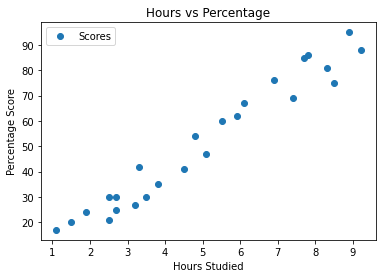

In [7]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph,we observe that as Hours increases Scores also increases i.e Here is positive relationship between hours studied and the scores obtained.

# Preparing the data 

In [8]:
dx=data.iloc[:,:-1]
dy=data.iloc[:,:1]

In [9]:
X = data.iloc[:, :-1].values  
print(X)
y = data.iloc[:, 1].values  
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Splitting the data into train and test 

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  


In [14]:
regressor.fit(X_train.reshape(-1,1),y_train)
print("Training complete.")


Training complete.


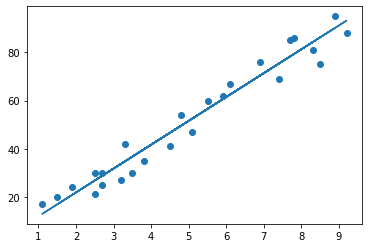

In [15]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions

In [16]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Visualization of Actual & Predicted values

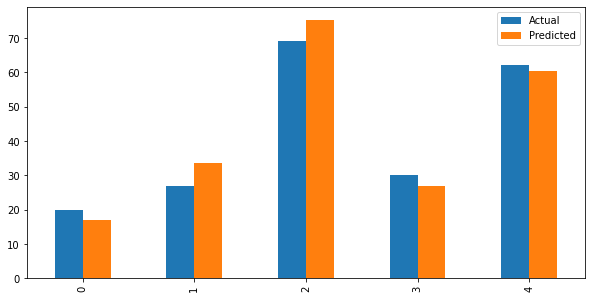

In [18]:
df.plot(kind ='bar',figsize=(10,5))
plt.show()

# Plotting Regression Line

In [19]:
print(regressor.intercept_)

2.0181600414346974


In [20]:
print(regressor.coef_)

[9.91065648]


In [21]:
reg_line = regressor.coef_*X+regressor.intercept_
# reg_line

Therefore, the equation of our simple linear regression model is Scores = 9.9106564*Hours studied+2.018160041434683

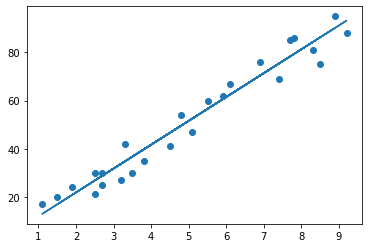

In [22]:
plt.scatter(X,y)
plt.plot(X,reg_line)
plt.show()

# Prdecting Custom Data

In [23]:
prediction_score = regressor.predict([[9.25]])
print('Predicted Score of a student studying 9.25 hours:',prediction_score)

Predicted Score of a student studying 9.25 hours: [93.69173249]


# According to the model,if a student studies for 9.25 hours he/she would obtain a score of 93.69173249

# Evaluating Model Performance


In [24]:
import sklearn.metrics as metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
